# Getting Started with OPERA DSWx Products
## Visualizing OPERA Dynamic Surface Water Extent (DSWx) product and Harmonized Landsat-8 Sentinel-2 (HLS) data in the Cloud using CMR's SpatioTemporal Asset Catalog (CMR-STAC)
### This tutorial demonstrates how to work with the OPERA DSWx Products and query the input HLS Landsat 8 ([HLSL30.002](https://doi.org/10.5067/HLS/HLSL30.002)) and Sentinel-2 ([HLSS30.002](https://doi.org/10.5067/HLS/HLSS30.002)) data products.

---    

### Data Used in the Example  

- **Daily 30 meter (m) global HLS Sentinel-2 Multi-spectral Instrument Surface Reflectance - [HLSS30.002](https://doi.org/10.5067/HLS/HLSS30.002)**
    - _The HLSS30 product provides 30 m Nadir normalized Bidirectional Reflectance Distribution Function (BRDF)-Adjusted Reflectance (NBAR) and is derived from Sentinel-2A and Sentinel-2B MSI data products._  
     - **Science Dataset (SDS) layers:**  
        - B8A (NIR Narrow)  
        - B04 (Red)  
        - B02 (Blue)  

- **Daily 30 meter (m) global HLS Landsat-8 OLI Surface Reflectance - [HLSL30.002](https://doi.org/10.5067/HLS/HLSL30.002)**
    - _The HLSL30 product provides 30 m Nadir normalized Bidirectional Reflectance Distribution Function (BRDF)-Adjusted Reflectance (NBAR) and is derived from Landsat-8 OLI data products._  
     - **Science Dataset (SDS) layers:**  
        - B05 (NIR)  
        - B04 (Red)  
        - B02 (Blue)  
        
---

## Before Starting this Tutorial  

A [NASA Earthdata Login](https://urs.earthdata.nasa.gov/) account is required to download the data used in this tutorial. You can create an account at the link provided.

You will will also need to have a netrc file set up in your home directory in order to successfully run the code below. Check out the `Setting up a netrc File` section in the [README](https://git.earthdata.nasa.gov/projects/LPDUR/repos/hls-tutorial/browse/README.md).

---
## 1. Getting Started <a id="getstarted"></a>

### 1.1 Import Packages <a id="1.1"></a>

In [1]:
%load_ext autoreload
%autoreload 2



<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
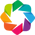

In [2]:
import os
from pystac_client import Client  
from pystac_client import ItemSearch
from pystac.item import Item
from typing import Dict, Any
import json

import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm

from shapely.geometry import box
from shapely.geometry import shape
from shapely.ops import transform

import numpy as np
import pandas as pd
import geopandas as gpd
from skimage import io

from osgeo import gdal
import rasterio as rio
from rasterio.mask import mask
from rasterio.enums import Resampling
from rasterio.shutil import copy

import pyproj
from pyproj import Proj

import xarray as xr
import geoviews as gv
from cartopy import crs
import hvplot.xarray
import holoviews as hv
gv.extension('bokeh', 'matplotlib')

### 1.2 Set up Working Environment <a id="1.2"></a>

In [3]:
inDir = os.getcwd()
os.chdir(inDir)

### 1.3 Initialize the Search Parameters <a id="1.3"></a>

In [4]:
aoi = box(-114.9, 36.0, -114.0, 36.5)
start_date = datetime(2021, 1, 1)                                       # in 2022-01-01 00:00:00 format
stop_date = f"{datetime.today().strftime('%Y-%m-%d')} 23:59:59"         # in 2022-01-01 00:00:00 format
overlap_threshold = 50                                                  # in percent
cloud_cover_threshold = 40                                              # in percent

print(f"Search between {start_date} and {stop_date}")
print(f"With AOI: {aoi.__geo_interface__}")

Search between 2021-01-01 00:00:00 and 2022-06-28 23:59:59
With AOI: {'type': 'Polygon', 'coordinates': (((-114.0, 36.0), (-114.0, 36.5), (-114.9, 36.5), (-114.9, 36.0), (-114.0, 36.0)),)}


### 1.4 Initialize STAC API and search for HLS Collections in LP DAAC Catalogs <a id="1.4"></a>

In [5]:
## Uncomment to inspect parameters inside ItemSearch
#ItemSearch??

In [6]:
stac = 'https://cmr.earthdata.nasa.gov/stac/'    # CMR-STAC API Endpoint
api = Client.open(f'{stac}/LPCLOUD/')
hls_collections = ['HLSL30.v2.0', 'HLSS30.v2.0']

search_params = {"collections": hls_collections,
                 "intersects": aoi.__geo_interface__,
                 "datetime": [start_date, stop_date],
                 "max_items": 1000}
search_hls = api.search(**search_params)

### 1.5 Compute for spatial overlap with respect to defined AOI <a id="1.5"></a>

In [7]:
# Function to calculate percentage overlap
def intersection_percent(item: Item, aoi: Dict[str, Any]) -> float:
    '''The percentage that the Item's geometry intersects the AOI. An Item that
    completely covers the AOI has a value of 100.
    '''
    geom_item = shape(item.geometry)
    geom_aoi = shape(aoi)
    intersected_geom = geom_aoi.intersection(geom_item)
    intersection_percent = (intersected_geom.area * 100) / geom_aoi.area

    return intersection_percent

In [8]:
# Filter datasets based on spatial overlap and cloud cover
intersects_geometry = aoi.__geo_interface__

#Check percent overlap values
print("Percent overlap before filtering: ")
print([f"{intersection_percent(i, intersects_geometry):.2f}" for i in search_hls.items()])

#Check cloud cover values
print("")
print("Cloud cover before filtering: ")
print([f"{i.properties['eo:cloud_cover']}" for i in search_hls.items()])

# Apply spatial overlap and cloud cover threshold
hls_filtered = (
    i for i in search_hls.items() if intersection_percent(i, intersects_geometry) > overlap_threshold \
        and i.properties['eo:cloud_cover'] <= cloud_cover_threshold
)

Percent overlap before filtering: 
['36.63', '81.36', '24.31', '7.51', '19.95', '6.32', '28.00', '28.19', '7.34', '7.91', '36.62', '81.36', '24.31', '7.51', '19.95', '6.32', '24.31', '81.31', '36.59', '7.54', '6.32', '19.99', '36.63', '81.36', '24.31', '7.51', '19.95', '6.32', '36.63', '81.36', '24.31', '7.51', '19.95', '6.32', '6.32', '7.54', '19.99', '81.31', '24.31', '36.59', '36.63', '81.36', '24.31', '7.51', '19.95', '6.32', '36.63', '81.36', '24.31', '7.51', '19.95', '6.32', '28.13', '27.72', '7.84', '7.30', '36.63', '81.36', '7.51', '19.95', '36.60', '24.31', '81.31', '7.54', '6.32', '19.99', '36.63', '81.36', '24.31', '7.51', '19.95', '6.32', '36.63', '81.36', '24.31', '7.51', '19.95', '6.32', '28.25', '28.27', '7.97', '7.37', '36.63', '81.36', '24.31', '7.51', '19.95', '6.32', '36.63', '81.36', '24.31', '7.51', '19.95', '6.32', '36.60', '81.30', '24.31', '19.99', '7.54', '6.32', '36.63', '81.36', '24.31', '7.51', '19.95', '6.32', '28.11', '27.65', '7.27', '7.82', '24.31', '7.5

In [9]:
# Inspect the items inside the filltered query
hls_data = list(hls_filtered)
# Inspect one data
hls_data[0].to_dict()

{'type': 'Feature',
 'stac_version': '1.0.0',
 'id': 'HLS.S30.T11SQA.2021005T182739.v2.0',
 'properties': {'datetime': '2021-01-05T18:34:08.668000Z',
  'start_datetime': '2021-01-05T18:34:08.668Z',
  'end_datetime': '2021-01-05T18:34:08.668Z',
  'eo:cloud_cover': 0},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-113.563414, 36.007451],
    [-113.5194145, 36.9955107],
    [-114.7520695, 37.0252843],
    [-114.7805265, 36.0361759],
    [-113.563414, 36.007451]]]},
 'links': [{'rel': 'self',
   'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSS30.v2.0/items/HLS.S30.T11SQA.2021005T182739.v2.0'},
  {'rel': 'parent',
   'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSS30.v2.0'},
  {'rel': 'collection',
   'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSS30.v2.0'},
  {'rel': <RelType.ROOT: 'root'>,
   'href': 'https://cmr.earthdata.nasa.gov/stac//LPCLOUD/',
   'type': <MediaType.JSON: 'application/json'>,
   'title': 'LPCLOUD'

In [10]:
## Print search information
# Tota granules
print(f"Total granules after search filter: {len(hls_data)}")

#Check percent overlap values
print("Percent-overlap: ")
print([f"{intersection_percent(i, intersects_geometry):.2f}" for i in hls_data])

#Check cloud cover values
print("")
print("Cloud cover: ")
print([f"{i.properties['eo:cloud_cover']}" for i in hls_data])

Total granules after search filter: 99
Percent-overlap: 
['81.36', '81.36', '81.36', '81.36', '81.36', '81.36', '81.36', '81.36', '81.36', '81.30', '81.36', '81.36', '81.36', '81.30', '81.36', '81.36', '81.36', '81.30', '81.36', '81.36', '81.30', '81.36', '81.36', '81.36', '81.36', '81.30', '81.36', '81.36', '81.36', '81.30', '81.36', '81.36', '81.31', '81.36', '81.36', '81.36', '81.36', '81.36', '81.31', '81.36', '81.36', '81.31', '81.36', '81.36', '81.36', '81.31', '81.36', '81.36', '81.31', '81.36', '81.36', '81.36', '81.30', '81.36', '81.36', '81.31', '81.36', '81.36', '81.31', '81.36', '81.36', '81.36', '81.36', '81.36', '81.36', '81.36', '81.30', '81.36', '81.36', '81.30', '81.36', '81.36', '81.36', '81.36', '81.36', '81.36', '81.30', '81.36', '81.36', '81.36', '81.29', '81.36', '81.36', '81.36', '81.36', '81.36', '81.30', '81.36', '81.36', '81.31', '81.36', '81.36', '81.30', '81.30', '81.36', '81.36', '81.31', '81.36', '81.30']

Cloud cover: 
['0', '35', '0', '15', '1', '0', '0'

### 1.6 Visualize the AOI and HLS granules' footprint based on search parameters <a id="1.6"></a>

In [11]:
geom_df = []
for d,_ in enumerate(hls_data):
    geom_df.append(shape(hls_data[d].geometry))

geom_granules = gpd.GeoDataFrame({'geometry':geom_df})
granules_poly = gv.Polygons(geom_granules).opts(line_color='blue', color=None)

# Use geoviews to combine a basemap with the shapely polygon of our Region of Interest (ROI)
base = gv.tile_sources.EsriImagery.opts(width=1000, height=1000)

# Get the user-specified aoi
geom_aoi = shape(intersects_geometry)
aoi_poly = gv.Polygons(geom_aoi).opts(line_color='yellow', color=None)

# Plot using geoviews wrapper
granules_poly*base*aoi_poly

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]
   .WMTS.I      :WMTS   [Longitude,Latitude]
   .Polygons.II :Polygons   [Longitude,Latitude]

In [12]:
# GDAL configurations used to successfully access LP DAAC Cloud Assets via vsicurl 
gdal.SetConfigOption('GDAL_HTTP_COOKIEFILE','~/cookies.txt')
gdal.SetConfigOption('GDAL_HTTP_COOKIEJAR', '~/cookies.txt')
gdal.SetConfigOption('GDAL_DISABLE_READDIR_ON_OPEN','EMPTY_DIR')
gdal.SetConfigOption('CPL_VSIL_CURL_ALLOWED_EXTENSIONS','TIF')

In [13]:
print([f"{i.properties['datetime']}" for i in hls_data])

['2021-01-05T18:34:08.668000Z', '2021-01-10T18:34:10.541Z', '2021-01-15T18:34:09.492Z', '2021-01-20T18:34:10.543Z', '2021-01-30T18:34:09.936Z', '2021-02-04T18:34:09.120Z', '2021-02-19T18:34:09.181Z', '2021-02-24T18:34:08.192Z', '2021-03-01T18:34:09.658Z', '2021-03-02T18:15:09.045Z', '2021-03-06T18:34:08.959Z', '2021-03-21T18:34:08.558Z', '2021-03-31T18:34:07.027Z', '2021-04-03T18:14:56.412Z', '2021-04-05T18:34:07.331Z', '2021-04-10T18:34:04.844Z', '2021-04-15T18:34:05.539Z', '2021-04-19T18:14:49.954Z', '2021-04-20T18:34:05.033Z', '2021-04-30T18:34:07.393Z', '2021-05-05T18:14:40.096Z', '2021-05-05T18:34:07.013Z', '2021-05-10T18:34:09.089Z', '2021-05-15T18:34:08.932Z', '2021-05-20T18:34:10.162Z', '2021-05-21T18:14:49.824Z', '2021-05-25T18:34:10.168Z', '2021-05-30T18:34:10.607Z', '2021-06-04T18:34:10.761Z', '2021-06-06T18:14:57.758Z', '2021-06-14T18:34:10.803Z', '2021-06-24T18:34:10.223Z', '2021-07-08T18:15:05.080Z', '2021-07-09T18:34:12.654Z', '2021-07-14T18:34:11.808Z', '2021-07-19T18:3

### 1.7 Build a Geodatabase <a id="1.7"></a>

In [14]:
hls_data_df = []
for item in hls_data:
    item.to_dict()
    ID = item.id
    dat = item.datetime.strftime('%Y-%m-%d')
    spatial_coverage = intersection_percent(item, intersects_geometry)
    cloud_cover = item.properties['eo:cloud_cover']
    geom = item.geometry
    thumb = item.assets['browse'].href
    
    collection = item.assets['B01'].href.split('/')[4]
    if collection == 'HLSS30.020':
        band_links = [item.assets['B8A'].href, item.assets['B04'].href, item.assets['B02'].href]
    elif collection == 'HLSL30.020':
        band_links = [item.assets['B05'].href, item.assets['B04'].href, item.assets['B02'].href]
    
    hls_data_df.append([dat,ID,collection,cloud_cover,geom,spatial_coverage,band_links,thumb])

hls_data_df = pd.DataFrame(hls_data_df, columns = ['Date', 'ID', 'Collection', 'Cloud_Cover','Footprint','Spatial_Coverage','Band_Links','Thumbnail'])


In [15]:
# Find cloud cover equal to 0
hls_data_df[hls_data_df['Cloud_Cover'] == 0]

Date                                  ID  Collection  Cloud_Cover  \
0   2021-01-05  HLS.S30.T11SQA.2021005T182739.v2.0  HLSS30.020            0   
2   2021-01-15  HLS.S30.T11SQA.2021015T182719.v2.0  HLSS30.020            0   
5   2021-02-04  HLS.S30.T11SQA.2021035T182539.v2.0  HLSS30.020            0   
6   2021-02-19  HLS.S30.T11SQA.2021050T182411.v2.0  HLSS30.020            0   
8   2021-03-01  HLS.S30.T11SQA.2021060T182301.v2.0  HLSS30.020            0   
10  2021-03-06  HLS.S30.T11SQA.2021065T182129.v2.0  HLSS30.020            0   
13  2021-04-03  HLS.L30.T11SQA.2021093T181456.v2.0  HLSL30.020            0   
14  2021-04-05  HLS.S30.T11SQA.2021095T181919.v2.0  HLSS30.020            0   
15  2021-04-10  HLS.S30.T11SQA.2021100T181921.v2.0  HLSS30.020            0   
17  2021-04-19  HLS.L30.T11SQA.2021109T181449.v2.0  HLSL30.020            0   
20  2021-05-05  HLS.L30.T11SQA.2021125T181440.v2.0  HLSL30.020            0   
21  2021-05-05  HLS.S30.T11SQA.2021125T181909.v2.0  HLSS30.020            0   
22  2021-05-10  HLS.S30.T11SQA.2021130T181921.v2.0  HLSS30.020            0   
24  2021-05-20  HLS.S30.T11SQA.2021140T181921.v2.0  HLSS30.020            0   
37  2021-08-08  HLS.S30.T11SQA.2021220T181921.v2.0  HLSS30.020            0   
38  2021-08-09  HLS.L30.T11SQA.2021221T181517.v2.0  HLSL30.020            0   
40  2021-08-23  HLS.S30.T11SQA.2021235T181919.v2.0  HLSS30.020            0   
44  2021-09-07  HLS.S30.T11SQA.2021250T181921.v2.0  HLSS30.020            0   
47  2021-09-22  HLS.S30.T11SQA.2021265T181959.v2.0  HLSS30.020            0   
49  2021-09-27  HLS.S30.T11SQA.2021270T182131.v2.0  HLSS30.020            0   
51  2021-10-27  HLS.S30.T11SQA.2021300T182451.v2.0  HLSS30.020            0   
52  2021-10-28  HLS.L30.T11SQA.2021301T181536.v2.0  HLSL30.020            0   
54  2021-11-11  HLS.S30.T11SQA.2021315T182609.v2.0  HLSS30.020            0   
55  2021-11-13  HLS.L30.T11SQA.2021317T181532.v2.0  HLSL30.020            0   
58  2021-11-29  HLS.L30.T11SQA.2021333T181532.v2.0  HLSL30.020            0   
60  2021-12-11  HLS.S30.T11SQA.2021345T182749.v2.0  HLSS30.020            0   
63  2022-01-20  HLS.S30.T11SQA.2022020T182659.v2.0  HLSS30.020            0   
67  2022-02-04  HLS.S30.T11SQA.2022035T182541.v2.0  HLSS30.020            0   
68  2022-02-09  HLS.S30.T11SQA.2022040T182509.v2.0  HLSS30.020            0   
70  2022-02-19  HLS.S30.T11SQA.2022050T182409.v2.0  HLSS30.020            0   
74  2022-03-11  HLS.S30.T11SQA.2022070T182049.v2.0  HLSS30.020            0   
76  2022-03-21  HLS.L30.T11SQA.2022080T181502.v2.0  HLSL30.020            0   
77  2022-03-21  HLS.S30.T11SQA.2022080T181939.v2.0  HLSS30.020            0   
79  2022-04-05  HLS.S30.T11SQA.2022095T181921.v2.0  HLSS30.020            0   
80  2022-04-06  HLS.L30.T11SQA.2022096T181457.v2.0  HLSL30.020            0   
86  2022-05-08  HLS.L30.T11SQA.2022128T181503.v2.0  HLSL30.020            0   
95  2022-06-14  HLS.S30.T11SQA.2022165T181931.v2.0  HLSS30.020            0   

                                            Footprint  Spatial_Coverage  \
0   {'type': 'Polygon', 'coordinates': [[[-113.563...         81.360301   
2   {'type': 'Polygon', 'coordinates': [[[-113.563...         81.360301   
5   {'type': 'Polygon', 'coordinates': [[[-113.563...         81.360301   
6   {'type': 'Polygon', 'coordinates': [[[-113.563...         81.360301   
8   {'type': 'Polygon', 'coordinates': [[[-113.563...         81.360301   
10  {'type': 'Polygon', 'coordinates': [[[-113.563...         81.360301   
13  {'type': 'Polygon', 'coordinates': [[[-113.777...         81.299785   
14  {'type': 'Polygon', 'coordinates': [[[-113.563...         81.360301   
15  {'type': 'Polygon', 'coordinates': [[[-113.563...         81.360301   
17  {'type': 'Polygon', 'coordinates': [[[-113.789...         81.296405   
20  {'type': 'Polygon', 'coordinates': [[[-113.791...         81.295836   
21  {'type': 'Polygon', 'coordinates': [[[-113.563...         81.360301   
22  {'type': 'Polygon', 'coordin

### 1.8 Quickview of two granules <a id="1.8"></a>
Browse image files are loaded into memory.

In [58]:
getdatabydates = ['2021-05-05', '2022-06-14']               # my preferred dates
my_hls = hls_data_df[(hls_data_df['Date'].isin(getdatabydates)) & (hls_data_df['Collection'].isin(['HLSS30.020']))]
my_hls

Date                                  ID  Collection  Cloud_Cover  \
21  2021-05-05  HLS.S30.T11SQA.2021125T181909.v2.0  HLSS30.020            0   
95  2022-06-14  HLS.S30.T11SQA.2022165T181931.v2.0  HLSS30.020            0   

                                            Footprint  Spatial_Coverage  \
21  {'type': 'Polygon', 'coordinates': [[[-113.563...         81.360301   
95  {'type': 'Polygon', 'coordinates': [[[-113.563...         81.360301   

                                           Band_Links  \
21  [https://data.lpdaac.earthdatacloud.nasa.gov/l...   
95  [https://data.lpdaac.earthdatacloud.nasa.gov/l...   

                                            Thumbnail  
21  https://data.lpdaac.earthdatacloud.nasa.gov/lp...  
95  https://data.lpdaac.earthdatacloud.nasa.gov/lp...

In [60]:
# Load the two dates in memory
before_img = io.imread(my_hls.iloc[0].Thumbnail)
after_img = io.imread(my_hls.iloc[1].Thumbnail)

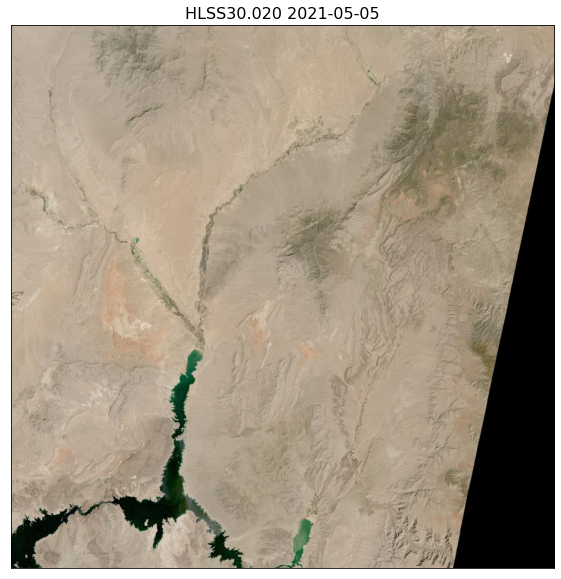

In [56]:
%matplotlib inline

#Plot using matplotlib
#Before 
plt.figure(figsize=(10,10))
plt.imshow(before_img)
plt.xticks([]); plt.yticks([])
plt.title(f"{my_hls.iloc[0].Collection} {my_hls.iloc[0].Date}",fontsize=16)
plt.show()

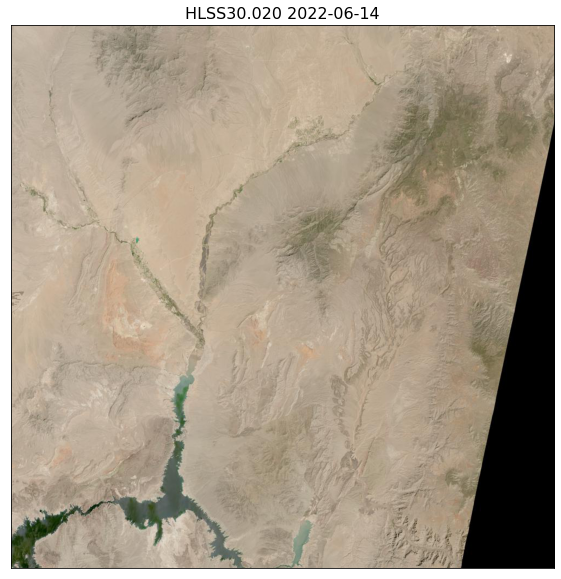

In [55]:
#After 
plt.figure(figsize=(10,10))
plt.imshow(after_img)
plt.xticks([]); plt.yticks([])
plt.title(f"{my_hls.iloc[1].Collection} {my_hls.iloc[1].Date}",fontsize=16)
plt.show()

In [57]:
del before_img; del after_img